<div style="color:white;background-color:#e90045;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+5 face="Lucida Calligraphy"><div style="align:center: justify">Titanic Survival Prediction</font></div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train_and_test2.csv
/kaggle/input/d/datasets/rahulsah06/titanic/train.csv
/kaggle/input/d/datasets/rahulsah06/titanic/test.csv
/kaggle/input/d/datasets/rahulsah06/titanic/gender_submission.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [4]:
titanic = pd.read_csv('../input/d/datasets/rahulsah06/titanic/train.csv')
titanic.head().style.set_properties(
    **{
        'background-color': 'LightBlue',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [5]:
print('Shape of Titanic data set is :',titanic.shape)
print('Size of Titanic data set is  :',titanic.size)

Shape of Titanic data set is : (891, 12)
Size of Titanic data set is  : 10692


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


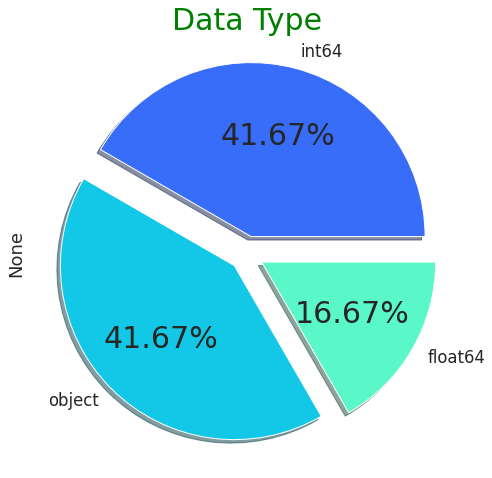

In [8]:
matplotlib.rcParams.update({'font.size': 30})

titanic.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.2f%%',
                                       shadow=True)
plt.title('Data Type',
          color='Green',
          loc='center',
          font='Lucida Calligraphy');

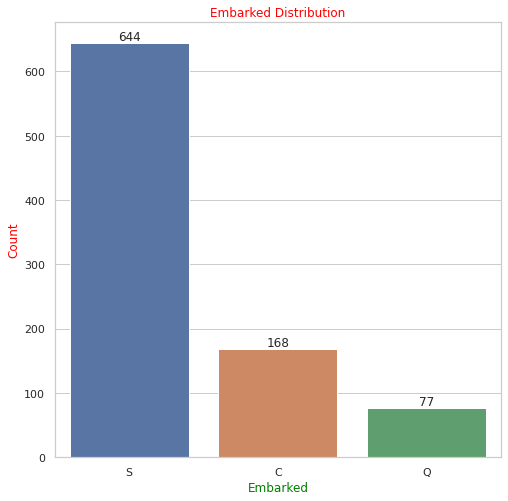

In [9]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=titanic,x='Embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center',font='Lucida Calligraphy');
plt.xlabel('Embarked',color='Green',loc='center',font='Lucida Calligraphy')
plt.ylabel('Count',color='Red',loc='center',font='Lucida Calligraphy');

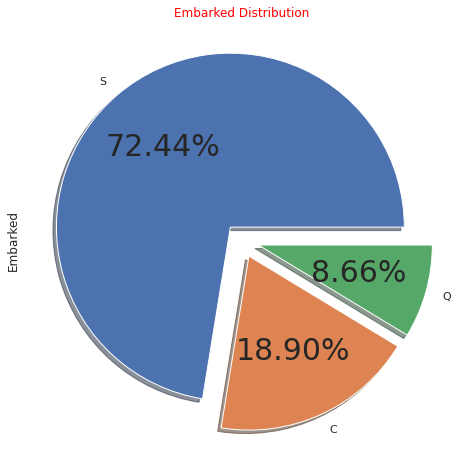

In [10]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center');

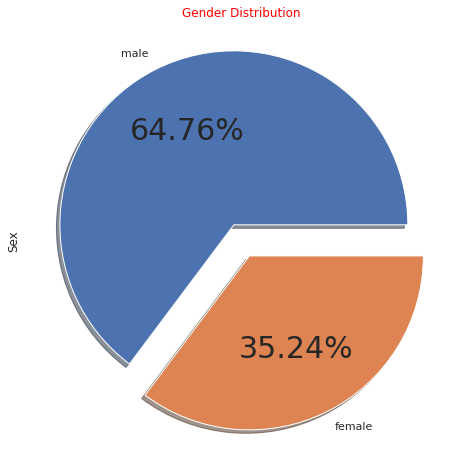

In [11]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

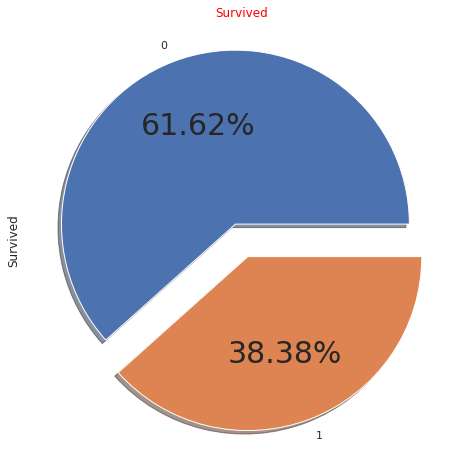

In [12]:
matplotlib.rcParams.update({'font.size': 30})
titanic['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

In [13]:
titanic.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


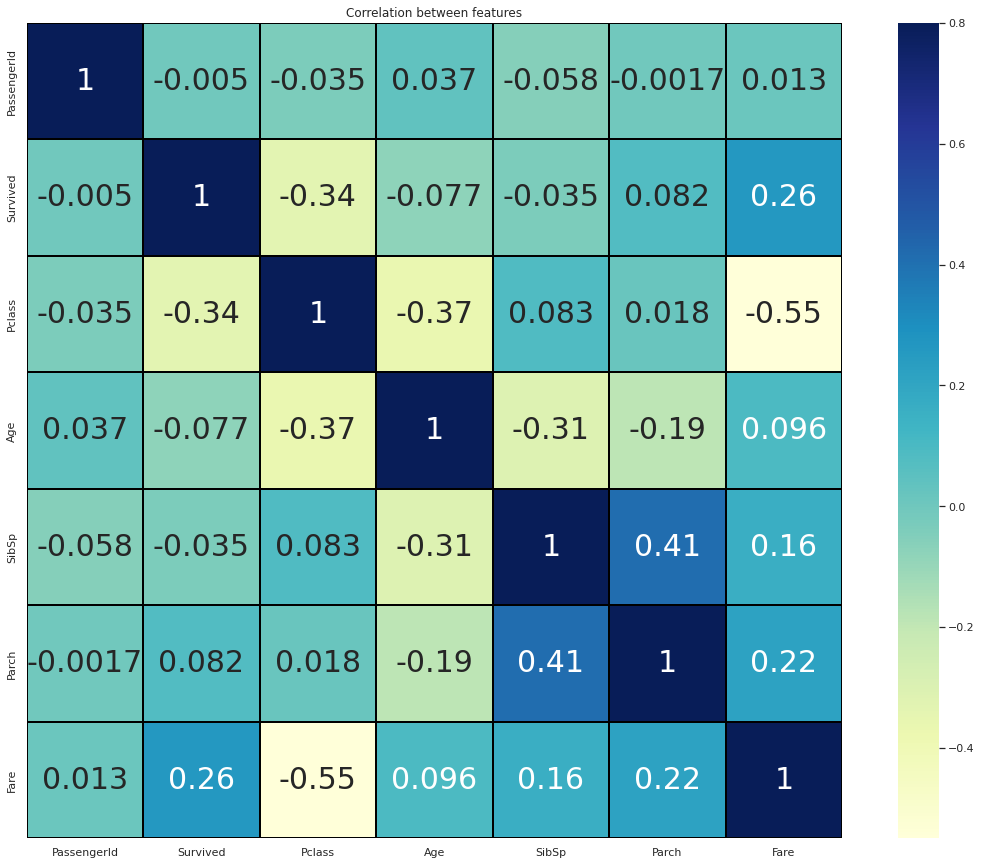

In [14]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [15]:
# correlation heatmap of higly correlated features with SalePrice

hig_corr = titanic.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

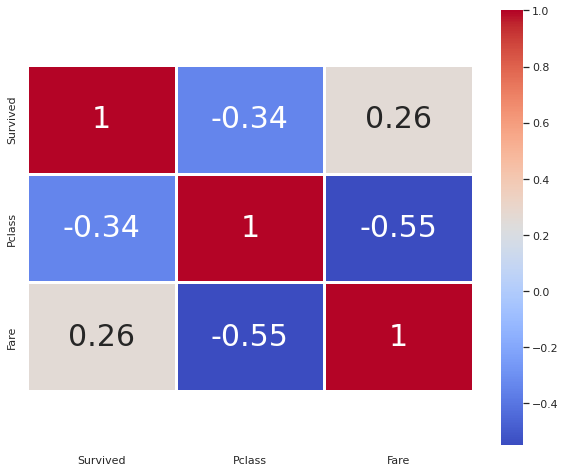

In [16]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(titanic[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

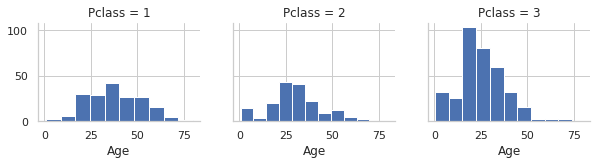

In [17]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:Blue">Methods to find Missing Values </h1>

In [18]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [19]:
missing_value(titanic).style.background_gradient(cmap='coolwarm').set_precision(2)

,Missing Number,Missing Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


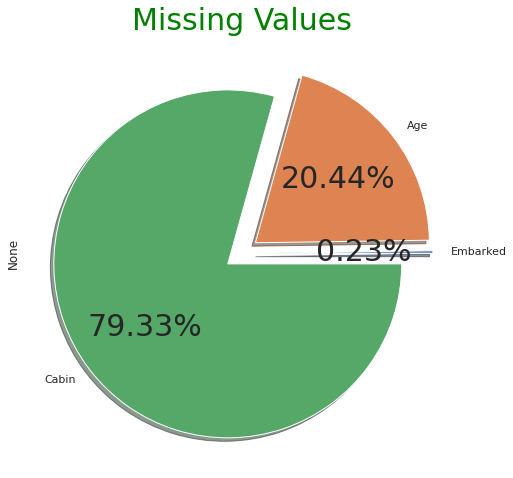

In [20]:
missing_values = titanic.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1, 0.1, 0.1],
                        autopct='%1.2f%%',
                        shadow=True)

plt.title('Missing Values',
          color='Green',
          loc='center',
          font='Lucida Calligraphy');

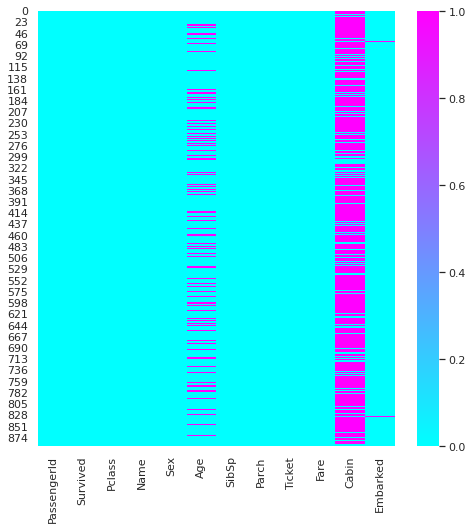

In [21]:
sns.heatmap(titanic.isnull(),cmap='cool');

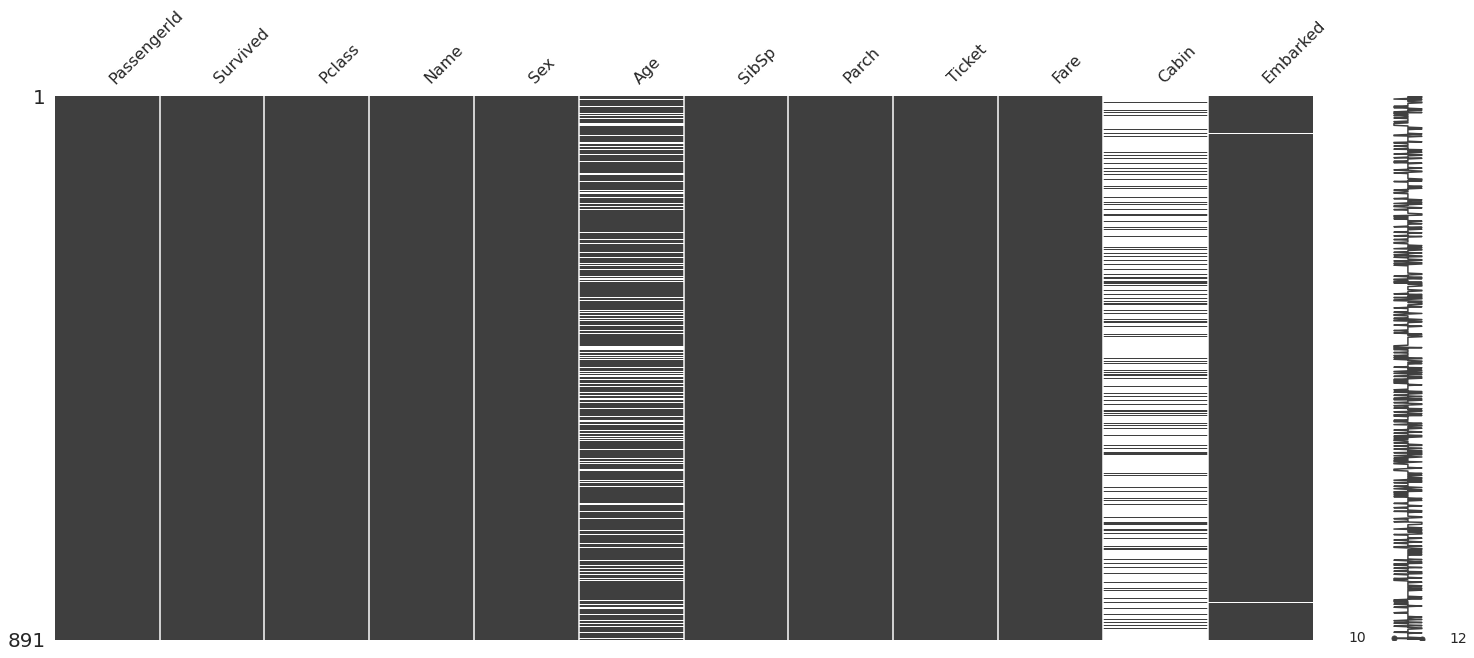

In [22]:
import missingno as msno
msno.matrix(titanic)
plt.show()

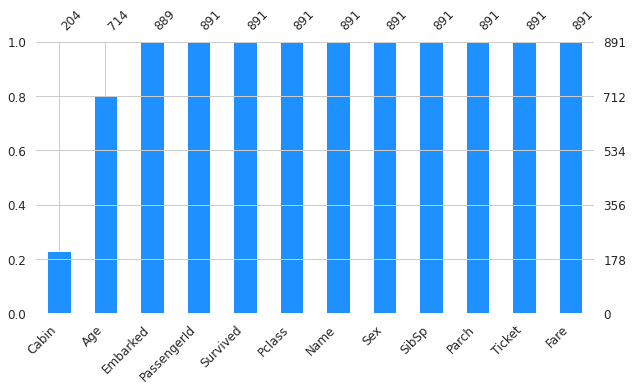

In [23]:
import missingno
missingno.bar(titanic, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

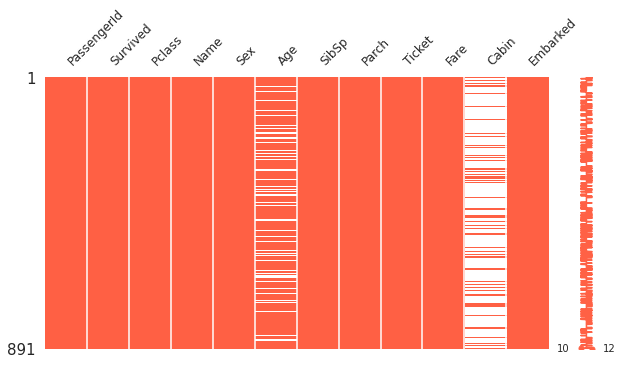

In [24]:
missingno.matrix(titanic, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));

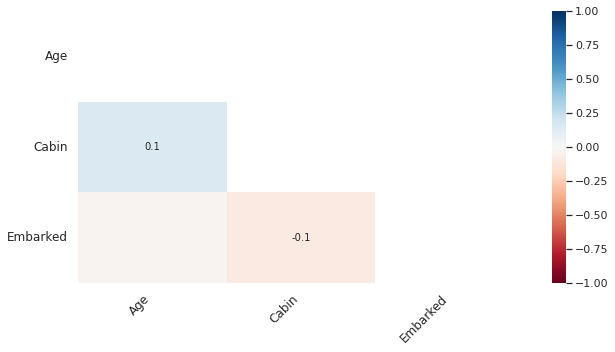

In [25]:
missingno.heatmap(titanic, figsize=(10,5), fontsize=12);

<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:blue"> Feature Engineering </h1>
<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Filling/Removing Missing Values </h2>

In [26]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [27]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
titanic['Embarked'] = titanic['Embarked'].fillna(method='bfill')

In [29]:
titanic = titanic.drop(['Cabin'],axis=1)

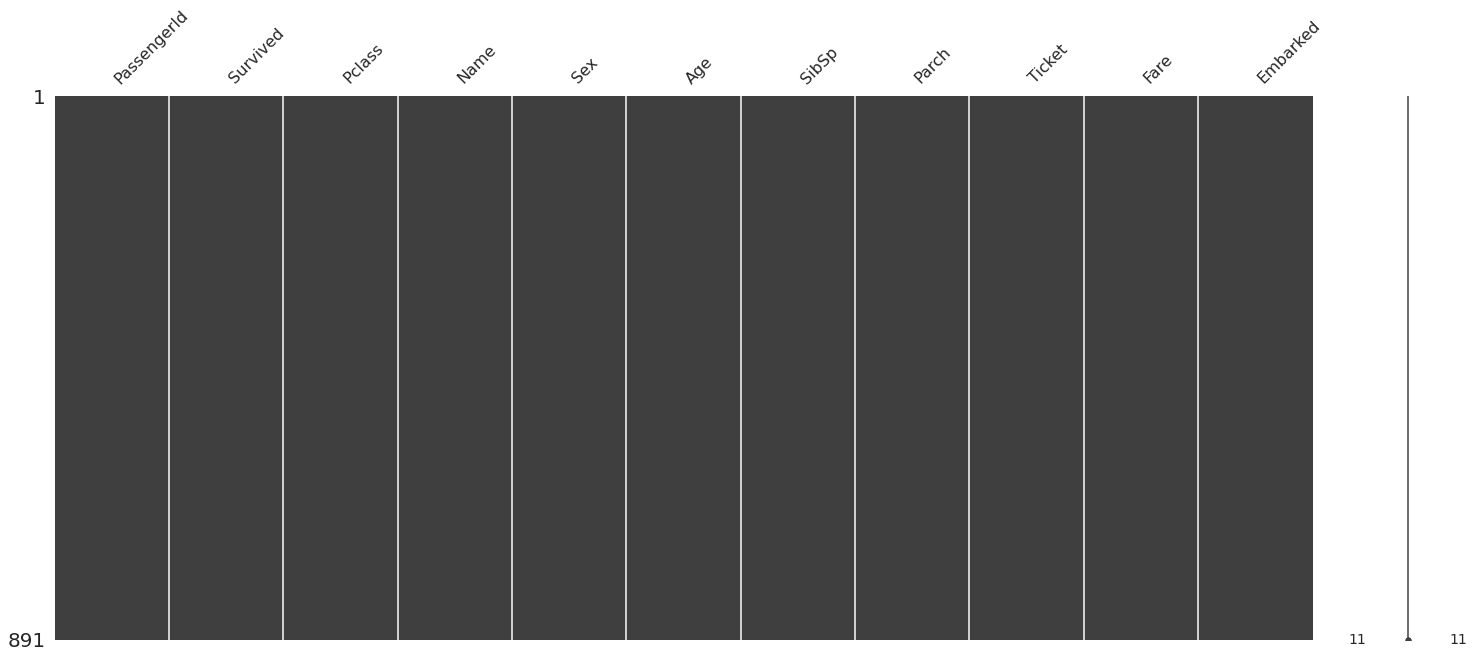

In [30]:
import missingno as msno
msno.matrix(titanic)
plt.show()

In [31]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<font color="Green" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">All the Missing Value is Filled/Removed</font>

In [32]:
titanic = titanic.drop(['Name','Ticket'],axis=1)

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<font color="Indigo" size=+1.5 face="Lucida Calligraphy"><div style="text-align: justify">Categorical feature (Sex & Embarked) is converted into numerical feature by using pandas dummy method</font>

In [34]:
titanic = pd.get_dummies(titanic,columns=['Sex','Embarked'],drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Train Test Split </h2>

In [35]:
X = titanic.drop(['Survived'],axis=1) 
y = titanic['Survived']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Standardizing the data</h2>

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [38]:
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.360492,-1.584396,0.010681,-0.479698,-0.460682,-0.018600,0.728823,-0.311564,-1.611198
1,-1.632266,-1.584396,-0.119643,-0.479698,-0.460682,0.079245,0.728823,-0.311564,0.620656
2,-1.344650,-1.584396,-0.503148,-0.479698,0.810657,0.646624,0.728823,-0.311564,-1.611198
3,-1.686680,-0.381742,-1.193456,0.493365,-0.460682,-0.031329,-1.372075,-0.311564,-1.611198
4,-1.111449,0.820913,0.033758,-0.479698,-0.460682,-0.479818,0.728823,-0.311564,0.620656


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.676433,0.820913,-0.273045,0.493365,-0.460682,-0.315867,-1.372075,-0.311564,0.620656
1,-0.248601,0.820913,-0.809952,-0.479698,-0.460682,-0.485419,0.728823,-0.311564,0.620656
2,1.096196,0.820913,-0.733251,-0.479698,-0.460682,-0.467343,0.728823,-0.311564,0.620656
3,1.488753,0.820913,0.010681,-0.479698,-0.460682,0.506858,0.728823,-0.311564,0.620656
4,0.027354,-0.381742,0.493964,0.493365,2.081997,-0.078596,0.728823,-0.311564,0.620656


<h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:40px; color:Blue">Model Implementation</h1>

<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> LogisticRegression</h2>

In [39]:
from sklearn.metrics import accuracy_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 80.2
Model Accuracy Score : 79.89


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Support Vector Machines</h2>

In [40]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 85.11
Model Accuracy Score  : 80.45


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> KNeighborsClassifier</h2>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",knn_train)
print("Model Accuracy Score  :",knn_accuracy)

Training Accuracy     : 90.03
Model Accuracy Score  : 75.98


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> GaussianNB</h2>

In [42]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train)
print("Model Accuracy Score  :",gaussian_accuracy)

Training Accuracy     : 79.21
Model Accuracy Score  : 81.56


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> Perceptron</h2>

In [43]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train)
print("Model Accuracy Score :",perceptron_accuracy)

Training Accuracy    : 73.17
Model Accuracy Score : 72.07


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> LinearSVC</h2>

In [44]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train)
print("Model Accuracy Score :",linear_svc_accuracy)

Training Accuracy    : 80.34
Model Accuracy Score : 81.01


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> SGDClassifier</h2>

In [45]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train)
print("Model Accuracy Score  :",sgd_accuracy)

Training Accuracy     : 79.78
Model Accuracy Score  : 81.01


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> DecisionTreeClassifier</h2>

In [46]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
Y_pred = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",decision_train)
print("Model Accuracy Score  :",decision_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 72.63


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> RandomForestClassifier</h2>

In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 81.56


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> MLPClassifier</h2>

In [48]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train)
print("Model Accuracy Score  :",mlp_accuracy)

Training Accuracy     : 86.38
Model Accuracy Score  : 79.89


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Magenta"> XGBClassifier</h2>

In [49]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train)
print("Model Accuracy Score  :",xgb_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 77.65


<h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Comparing Models</h2>

In [50]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ]
})

In [51]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
7,Decision Tree,100.00,72.63
8,GaussianNB,100.00,81.56
10,XGBClassifier,100.00,77.65
2,Logistic Regression,90.03,75.98
9,MLPClassifier,86.38,79.89
1,KNN,85.11,80.45
5,Stochastic Gradient Decent,80.34,81.01
0,Support Vector Machines,80.20,79.89
6,Linear SVC,79.78,81.01
3,Random Forest,79.21,81.56


In [52]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Random Forest,79.210000,81.560000
GaussianNB,100.000000,81.560000
Stochastic Gradient Decent,80.340000,81.010000
Linear SVC,79.780000,81.010000
KNN,85.110000,80.450000
Support Vector Machines,80.200000,79.890000
MLPClassifier,86.380000,79.890000
XGBClassifier,100.000000,77.650000
Logistic Regression,90.030000,75.980000
Decision Tree,100.000000,72.630000


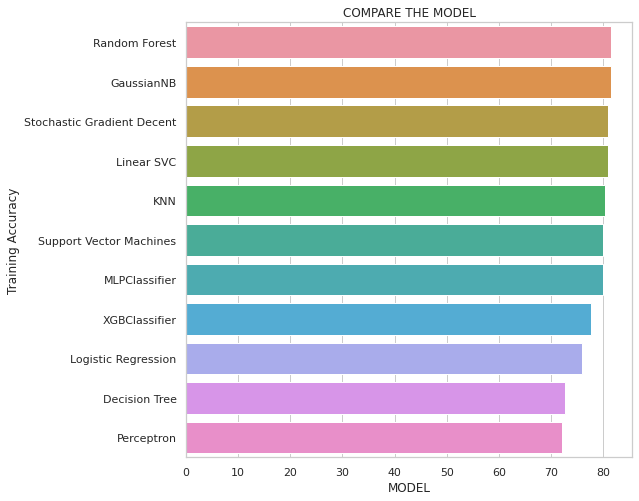

In [53]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:20]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');


In [54]:
from sklearn.ensemble import RandomForestClassifier

y = titanic["Survived"]

features = ["Pclass", "SibSp", "Parch"]
X = pd.get_dummies(titanic[features])
X_test = pd.get_dummies(titanic[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': titanic.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
